In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [142]:
mpgdf=pd.read_csv('e:/Datasets/mpg.csv',index_col='name')

In [143]:
mpgdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [144]:
mpgdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


In [145]:
mpgdf.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [146]:
mpgdf.shape

(398, 8)

In [147]:
mpgdf.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [148]:
mpgdf.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [149]:
mpgdf=mpgdf[mpgdf.horsepower!='?']

In [150]:
print('?' in mpgdf.horsepower)

False


In [151]:
mpgdf.shape

(392, 8)

In [152]:
mpgdf.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [153]:
mpgdf.horsepower = mpgdf.horsepower.astype('float')
import warnings

In [154]:
mpgdf.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [155]:
mpgdf.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [156]:
mpgdf.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

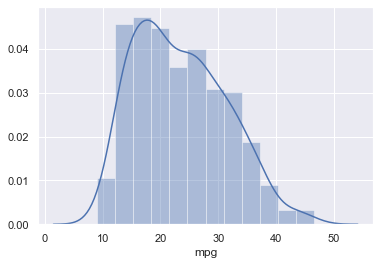

In [157]:
sns.distplot(mpgdf['mpg'])

In [158]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [159]:
mpgdf_scale=mpgdf.copy()

In [160]:
mpgdf_scale['displacement']=scale(mpgdf_scale['displacement'])
mpgdf_scale['horsepower']=scale(mpgdf_scale['horsepower'])
mpgdf_scale['acceleration']=scale(mpgdf_scale['acceleration'])
mpgdf_scale['weight']=scale(mpgdf_scale['weight'])
mpgdf_scale['mpg']=scale(mpgdf_scale['mpg'])

In [161]:
mpgdf_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [162]:
mpgdf['Country_code']=mpgdf.origin.replace([1,2,3],['USA','Europe','Japan'])
mpgdf_scale['Country_code']=mpgdf.origin.replace([1,2,3],['USA','Europe','Japan'])

In [163]:
mpgdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [164]:
mpgdf_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


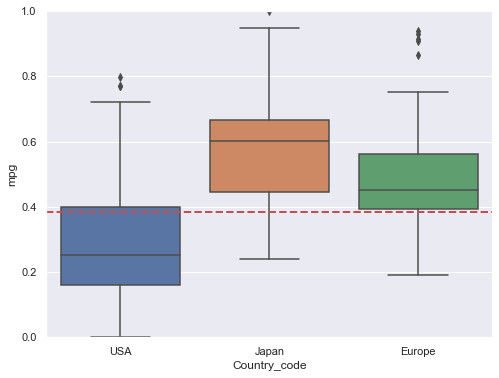

In [165]:
# Lets Look at mpg relation to categories
var = 'Country_code'
mpgdf_plt = pd.concat([mpgdf_scale['mpg'], mpgdf_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='mpg',data=mpgdf_plt)
fig.axis(ymin=0,ymax=1)
plt.axhline(mpgdf_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

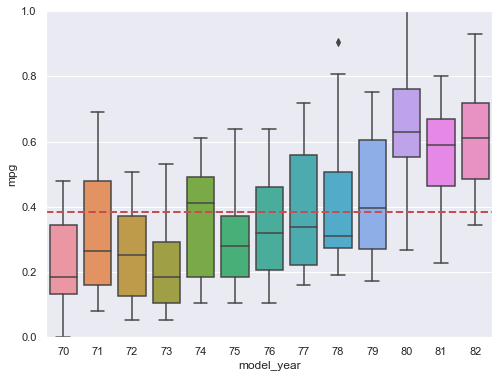

In [166]:
var = 'model_year'
mpgdf_plt = pd.concat([mpgdf_scale['mpg'], mpgdf_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='mpg',data=mpgdf_plt)
fig.axis(ymin=0,ymax=1)
plt.axhline(mpgdf_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

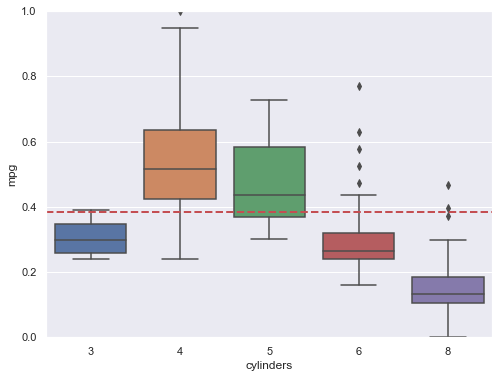

In [167]:
var = 'cylinders'
mpgdf_plt = pd.concat([mpgdf_scale['mpg'], mpgdf_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='mpg',data=mpgdf_plt)
fig.axis(ymin=0,ymax=1)
plt.axhline(mpgdf_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

# CORRELATION MATRIX

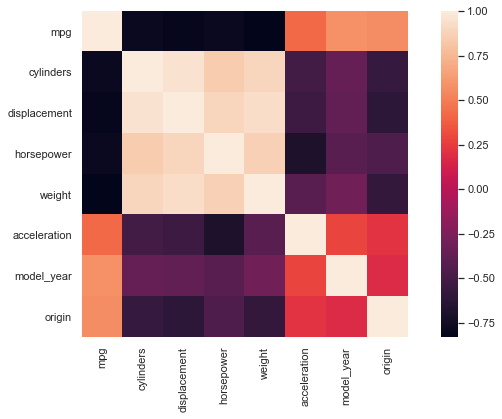

In [168]:
corrmat=mpgdf.corr()
f, ax= plt.subplots(figsize=(12,6))
sns.heatmap(corrmat,square=True);

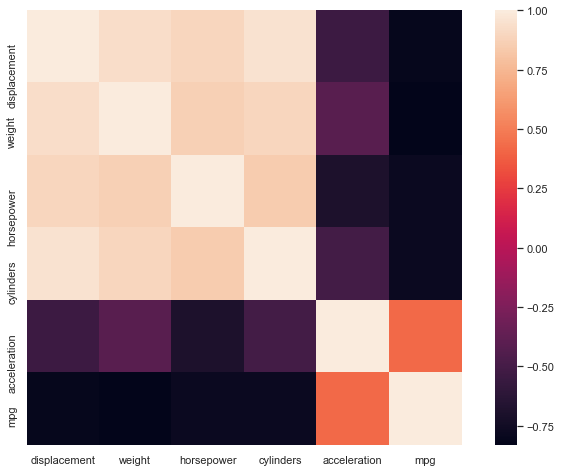

In [169]:
factors=['displacement','weight','horsepower','cylinders','acceleration','mpg']
corrmat=mpgdf[factors].corr()
f, ax= plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,square=True);

In [170]:
mpgdf.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
Country_code     object
dtype: object

In [171]:
# Look at some extremes like min and max of variables
var='mpg'
mpgdf[mpgdf[var]==mpgdf[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA


In [172]:
mpgdf[mpgdf[var]==mpgdf[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan


In [173]:
mpgdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [174]:
var='displacement'
mpgdf[mpgdf[var]==mpgdf[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe


In [175]:
mpgdf[mpgdf[var]==mpgdf[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA


In [176]:
var='weight'
mpgdf[mpgdf[var]==mpgdf[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan


In [177]:
mpgdf[mpgdf[var]==mpgdf[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA


In [178]:
var='horsepower'
mpgdf[mpgdf[var]==mpgdf[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe


In [179]:
var='horsepower'
mpgdf[mpgdf[var]==mpgdf[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA


In [180]:
var='acceleration'
mpgdf[mpgdf[var]==mpgdf[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA


In [181]:
mpgdf[mpgdf[var]==mpgdf[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe


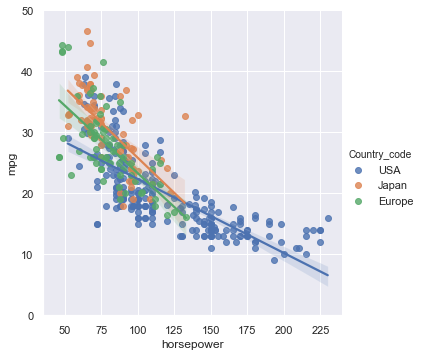

In [196]:
var='horsepower'
plot=sns.lmplot(var,'mpg',data=mpgdf,hue='Country_code')
plot.set(xlim=(35,240),ylim = (0,50))

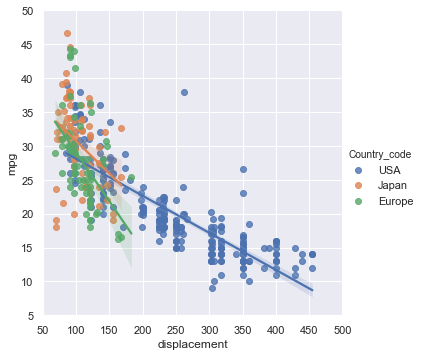

In [199]:
var='displacement'
plot=sns.lmplot(var,'mpg',data=mpgdf,hue='Country_code')
plot.set(xlim=(50,500),ylim=(5,50))

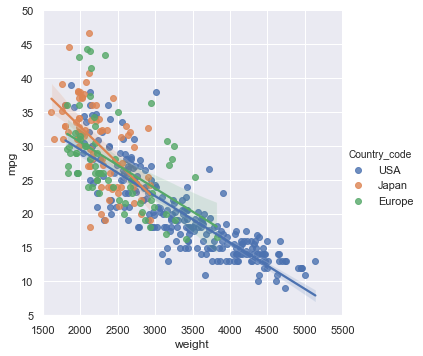

In [202]:
var='weight'
plot=sns.lmplot(var,'mpg',data=mpgdf,hue='Country_code')
plot.set(xlim=(1500,5500),ylim=(5,50))

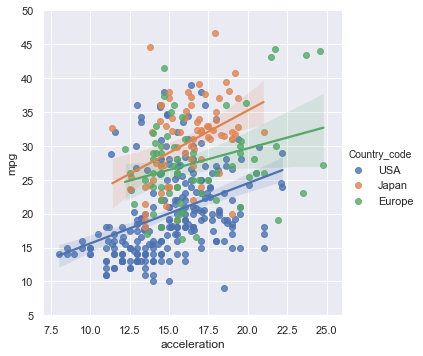

In [207]:
var='acceleration'
plot=sns.lmplot(var,'mpg',data=mpgdf,hue='Country_code')
plot.set(xlim=(7,26),ylim=(5,50))

In [208]:
mpgdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [211]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model_year']
X=pd.DataFrame(mpgdf[factors].copy())
y=mpgdf['mpg'].copy()

In [213]:
X=StandardScaler().fit_transform(X)

In [216]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0]==y_train.shape[0]

True

In [217]:
regressor = LinearRegression()

In [218]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [219]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
y_predicted = regressor.predict(X_test)

In [221]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [223]:
from sklearn.metrics import r2_score

In [225]:
r2=r2_score(y_true=y_test,y_pred=y_predicted)
print(r2)

0.8286430146299294


In [226]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [227]:
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [228]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [231]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.699487374105905

In [256]:
r2_bgr=r2_score(y_true=y_test,y_pred=y_predicted_gbr)
print(r2_bgr)

0.897286418389796


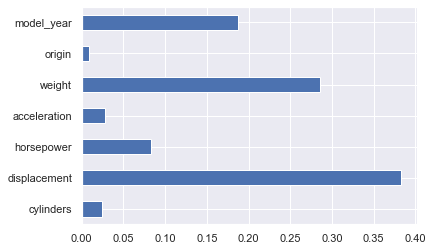

In [233]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [234]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA(n_components=2)

In [236]:
pca.fit(mpgdf[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [237]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [238]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [239]:
transformed_data = pca.transform(mpgdf[factors])

In [240]:
 pc1 = transformed_data[:,0]
 pc2 = transformed_data[:,1]

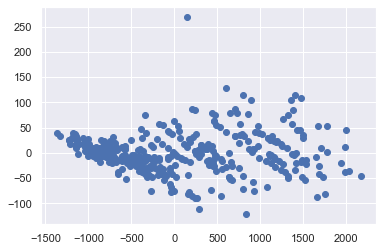

In [241]:
plt.scatter(pc1,pc2)

In [242]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])

In [243]:
factors

['cylinders',
 'displacement',
 'horsepower',
 'acceleration',
 'weight',
 'origin',
 'model_year']

In [244]:
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [245]:
mpgdf[(mpgdf['model_year'] == 70 )&( mpgdf.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_code
name,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA


In [246]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [248]:
grid = grid.fit(X_train, y_train)

In [249]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=41,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [250]:
gb_regressor_t = grid.best_estimator_

In [251]:
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=41,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [252]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [253]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.7009315519378676

In [255]:
gbr2=r2_score(y_true=y_test,y_pred=y_predicted_gbr_t)
print(gbr2)

0.8971764891063541


In [257]:
mpgdf.duplicated().any()

False